# What drives the price of a car?

![](images/kurt.jpeg)

**OVERVIEW**

In this application, you will explore a dataset from kaggle that contains information on 3 million used cars.  Your goal is to understand what factors make a car more or less expensive.  As a result of your analysis, you should provide clear recommendations to your client -- a used car dealership -- as to what consumers value in a used car.

### CRISP-DM Framework

<center>
    <img src = images/crisp.png width = 50%/>
</center>


To frame the task, throughout our practical applications we will refer back to a standard process in industry for data projects called CRISP-DM.  This process provides a framework for working through a data problem.  Your first step in this application will be to read through a brief overview of CRISP-DM [here](https://mo-pcco.s3.us-east-1.amazonaws.com/BH-PCMLAI/module_11/readings_starter.zip).  After reading the overview, answer the questions below.

### Business Understanding

From a business perspective, we are tasked with identifying key drivers for used car prices.  In the CRISP-DM overview, we are asked to convert this business framing to a data problem definition.  Using a few sentences, reframe the task as a data task with the appropriate technical vocabulary. 

- Tasks
Our challenge is to understand the factors that drive car pricing. In particular, understand the factors that affect the pricing of used cars in the American market. To do this, we need to find out:

1. Which and What variables are important when predicting the price of a car in the project.
2. How well these variables describe the price of the car.

Based on various market surveys, the consulting firm has gathered a large dataset of different types of used cars across the American market.

- Our Goal
Our aim is to model the price of vehicles with available explanatory variables. It will be used by various Used Car dealers to understand exactly how prices change with the explanatory variables. Accordingly, they can change business strategy and will help them understand the dynamics of prices in the Used car market.

In [85]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Data Understanding

After considering the business understanding, we want to get familiar with our data.  Write down some steps that you would take to get to know the dataset and identify any quality issues within.  Take time to get to know the dataset and explore what information it contains and how this could be used to inform your business understanding.

So let's start exploration step by step 

Step-1: Importing and Understanding our Dataset

Let's start with the following steps:

- Importing data using the pandas library
- Then Understanding the structure of the data

In [86]:
cars=pd.read_csv("C://Users/milin/Documents/AI_ML/Module 11/data/vehicles.csv")

In [88]:
# Print top 10 row values in table

cars.head(50)

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc
5,7222379453,hudson valley,1600,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
6,7221952215,hudson valley,1000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
7,7220195662,hudson valley,15995,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ny
8,7209064557,medford-ashland,5000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,or
9,7219485069,erie,3000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,pa


In [89]:
# display all main columns in Dataset
cars.columns

# there are 18 columns in the Dataset

Index(['id', 'region', 'price', 'year', 'manufacturer', 'model', 'condition',
       'cylinders', 'fuel', 'odometer', 'title_status', 'transmission', 'VIN',
       'drive', 'size', 'type', 'paint_color', 'state'],
      dtype='object')

Data Columns Description -

- ID : Index Column
- region : city or area within USA the used car was sold
- price : Value of teh car sold
- year : The year the car was manufactured
- manufacturer : Car Company Name
- model : Model Name of the car
- condition : The state of the used car when it was sold
- cylinders : The number of cylinders the used car has
- fuel : The type of fuel the used car ran on (gas, electric, hybrid, diesel, other)
- odometer : The odometer reading at the time used car was sold
- title_status : The status of the car title at the time the used car was sold (clean, salvaged, rebuilt, lien etc.)
- transmission : The transmission type of the used car
- VIN : The Vehicle Identification Number
- drive : The type of "wheel drive" of the used car (4WD, RWD, AWD etc.)
- size : The size of the car (full size, small etc.)
- type : The tuype of car, whether it is a SUV, sedan, pickup etc.
- paint_color : The color of the used car
- state : The state within USA where the car was sold. closely tied to the region

In [90]:
cars.describe()

,id,price,year,odometer
count,4.268800e+05,4.268800e+05,425675.000000,4.224800e+05
mean,7.311487e+09,7.519903e+04,2011.235191,9.804333e+04
std,4.473170e+06,1.218228e+07,9.452120,2.138815e+05
min,7.207408e+09,0.000000e+00,1900.000000,0.000000e+00
25%,7.308143e+09,5.900000e+03,2008.000000,3.770400e+04
50%,7.312621e+09,1.395000e+04,2013.000000,8.554800e+04
75%,7.315254e+09,2.648575e+04,2017.000000,1.335425e+05
max,7.317101e+09,3.736929e+09,2022.000000,1.000000e+07


In [91]:
cars.shape

#there are 426,880 rows and 18 columns

(426880, 18)

In [92]:
cars.isnull().sum()

id                   0
region               0
price                0
year              1205
manufacturer     17646
model             5277
condition       174104
cylinders       177678
fuel              3013
odometer          4400
title_status      8242
transmission      2556
VIN             161042
drive           130567
size            306361
type             92858
paint_color     130203
state                0
dtype: int64

In [93]:
cars["year"].fillna((2017.0),inplace = True)

In [94]:
cars['manufacturer'].value_counts()

ford               70985
chevrolet          55064
toyota             34202
honda              21269
nissan             19067
jeep               19014
ram                18342
gmc                16785
bmw                14699
dodge              13707
mercedes-benz      11817
hyundai            10338
subaru              9495
volkswagen          9345
kia                 8457
lexus               8200
audi                7573
cadillac            6953
chrysler            6031
acura               5978
buick               5501
mazda               5427
infiniti            4802
lincoln             4220
volvo               3374
mitsubishi          3292
mini                2376
pontiac             2288
rover               2113
jaguar              1946
porsche             1384
mercury             1184
saturn              1090
alfa-romeo           897
tesla                868
fiat                 792
harley-davidson      153
ferrari               95
datsun                63
aston-martin          24


In [95]:
cars["manufacturer"].fillna(('ford'),inplace = True)
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,2017.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,2017.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,2017.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,2017.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,2017.0,ford,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,nc


In [96]:
cars.model.value_counts()

f-150                      8009
silverado 1500             5140
1500                       4211
camry                      3135
silverado                  3023
                           ... 
plymouth fury 1               1
f550 box truck delivery       1
duramax 2500hd                1
3 s sport                     1
Paige Glenbrook Touring       1
Name: model, Length: 29649, dtype: int64

In [97]:
cars["model"].fillna(('f-150'),inplace = True)

In [98]:
cars["condition"].fillna(('good'),inplace = True)

In [99]:
cars["cylinders"].fillna(('6 cylinders'),inplace = True)

In [100]:
cars.fuel.value_counts()

gas         356209
other        30728
diesel       30062
hybrid        5170
electric      1698
Name: fuel, dtype: int64

In [101]:
cars["fuel"].fillna(('gas'),inplace = True)

In [102]:
cars.title_status.value_counts()

clean         405117
rebuilt         7219
salvage         3868
lien            1422
missing          814
parts only       198
Name: title_status, dtype: int64

In [103]:
cars["title_status"].fillna(('clean'),inplace = True)

In [104]:
cars.transmission.value_counts()

automatic    336524
other         62682
manual        25118
Name: transmission, dtype: int64

In [105]:
cars["transmission"].fillna(('automatic'),inplace = True)

In [106]:
cars['odometer'].value_counts()

100000.0    2263
1.0         2246
0.0         1965
200000.0    1728
150000.0    1603
            ... 
149468.0       1
154259.0       1
111887.0       1
213826.0       1
26892.0        1
Name: odometer, Length: 104870, dtype: int64

In [107]:
cars['odometer'].fillna(('2.0'),inplace=True)
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
0,7222695916,prescott,6000,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,az
1,7218891961,fayetteville,11900,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ar
2,7221797935,florida keys,21000,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,fl
3,7222270760,worcester / central MA,1500,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,ma
4,7210384030,greensboro,4900,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,NaN,NaN,NaN,NaN,NaN,nc


In [108]:
cars["VIN"].fillna(('1FMJU1JT1HEA52352'),inplace = True)
cars["drive"].fillna(('4wd'),inplace = True)


In [190]:
cars['size'].value_counts()
cars["size"].fillna(('full-size'),inplace = True)

In [110]:
cars.type.value_counts()

sedan          87056
SUV            77284
pickup         43510
truck          35279
other          22110
coupe          19204
hatchback      16598
wagon          10751
van             8548
convertible     7731
mini-van        4825
offroad          609
bus              517
Name: type, dtype: int64

In [111]:
cars["type"].fillna(('sedan'),inplace = True)

In [112]:
cars.paint_color.value_counts()

white     79285
black     62861
silver    42970
blue      31223
red       30473
grey      24416
green      7343
custom     6700
brown      6593
yellow     2142
orange     1984
purple      687
Name: paint_color, dtype: int64

In [113]:
cars["paint_color"].fillna(('white'),inplace = True)

In [114]:
cars.isnull().sum()

id              0
region          0
price           0
year            0
manufacturer    0
model           0
condition       0
cylinders       0
fuel            0
odometer        0
title_status    0
transmission    0
VIN             0
drive           0
size            0
type            0
paint_color     0
state           0
dtype: int64

In [115]:
cars.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 426880 entries, 0 to 426879
Data columns (total 18 columns):
 #   Column        Non-Null Count   Dtype  
---  ------        --------------   -----  
 0   id            426880 non-null  int64  
 1   region        426880 non-null  object 
 2   price         426880 non-null  int64  
 3   year          426880 non-null  float64
 4   manufacturer  426880 non-null  object 
 5   model         426880 non-null  object 
 6   condition     426880 non-null  object 
 7   cylinders     426880 non-null  object 
 8   fuel          426880 non-null  object 
 9   odometer      426880 non-null  object 
 10  title_status  426880 non-null  object 
 11  transmission  426880 non-null  object 
 12  VIN           426880 non-null  object 
 13  drive         426880 non-null  object 
 14  size          426880 non-null  object 
 15  type          426880 non-null  object 
 16  paint_color   426880 non-null  object 
 17  state         426880 non-null  object 
dtypes: f

In [116]:
cars.manufacturer.unique()

array(['ford', 'gmc', 'chevrolet', 'toyota', 'jeep', 'nissan', 'ram',
       'mazda', 'cadillac', 'honda', 'dodge', 'lexus', 'jaguar', 'buick',
       'chrysler', 'volvo', 'audi', 'infiniti', 'lincoln', 'alfa-romeo',
       'subaru', 'acura', 'hyundai', 'mercedes-benz', 'bmw', 'mitsubishi',
       'volkswagen', 'porsche', 'kia', 'rover', 'ferrari', 'mini',
       'pontiac', 'fiat', 'tesla', 'saturn', 'mercury', 'harley-davidson',
       'datsun', 'aston-martin', 'land rover', 'morgan'], dtype=object)

### Data Preparation

After our initial exploration and fine tuning of the business understanding, it is time to construct our final dataset prior to modeling.  Here, we want to make sure to handle any integrity issues and cleaning, the engineering of new features, any transformations that we believe should happen (scaling, logarithms, normalization, etc.), and general preparation for modeling with `sklearn`. 

In [117]:
# Checking for duplicates

cars.loc[cars.duplicated()]

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state


There are No Duplicates

# Next Step - Visualizing the Data

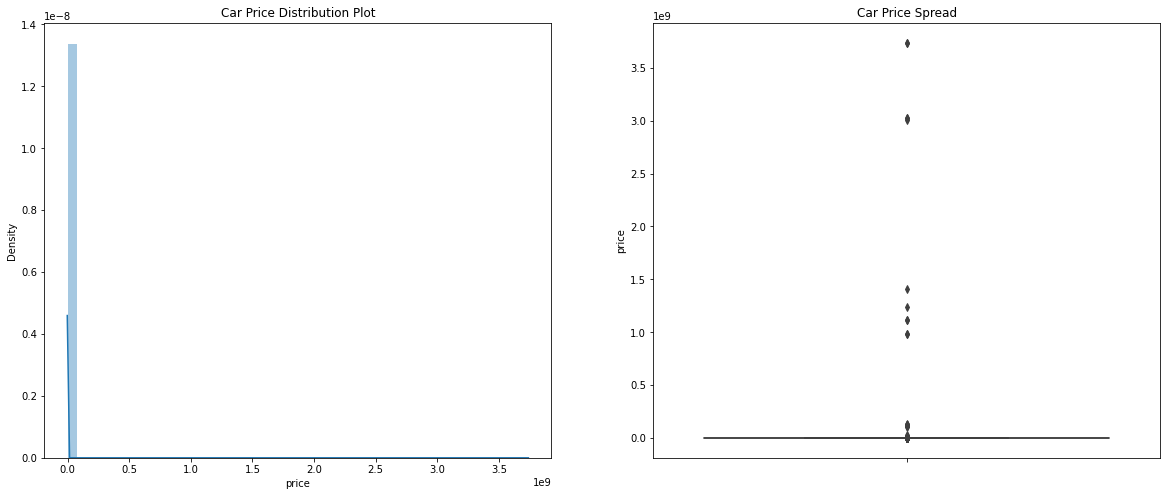

In [118]:
plt.figure(figsize=(20,8))

plt.subplot(1,2,1)
plt.title('Car Price Distribution Plot')
sns.distplot(cars.price)

plt.subplot(1,2,2)
plt.title('Car Price Spread')
sns.boxplot(y=cars.price)

plt.show()

In [119]:
cars['price'].mean()

75199.0331873126

In [120]:
print(cars.price.describe(percentiles = [0.25,0.50,0.75,0.85,0.90,1]))

count    4.268800e+05
mean     7.519903e+04
std      1.218228e+07
min      0.000000e+00
25%      5.900000e+03
50%      1.395000e+04
75%      2.648575e+04
85%      3.299500e+04
90%      3.759000e+04
100%     3.736929e+09
max      3.736929e+09
Name: price, dtype: float64


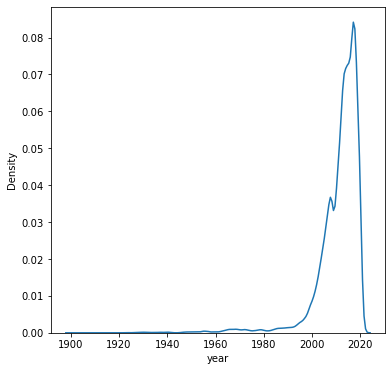

In [121]:
plt.figure(figsize = (6,6))
sns.kdeplot(x=cars.year)
plt.show()

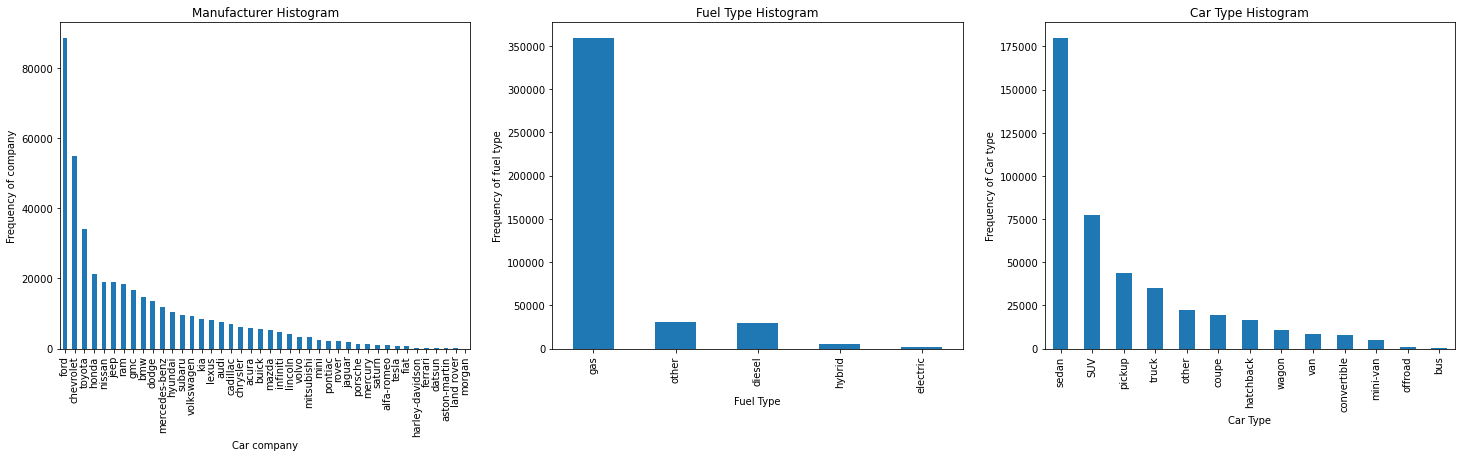

In [122]:
plt.figure(figsize=(25, 6))

plt.subplot(1,3,1)
plt1 = cars.manufacturer.value_counts().plot(kind='bar')
plt.title('Manufacturer Histogram')
plt1.set(xlabel = 'Car company', ylabel='Frequency of company')

plt.subplot(1,3,2)
plt1 = cars.fuel.value_counts().plot(kind='bar')
plt.title('Fuel Type Histogram')
plt1.set(xlabel = 'Fuel Type', ylabel='Frequency of fuel type')

plt.subplot(1,3,3)
plt1 = cars.type.value_counts().plot(kind='bar')
plt.title('Car Type Histogram')
plt1.set(xlabel = 'Car Type', ylabel='Frequency of Car type')

plt.show()

 - Conclusion:
1. Ford seems to be the favorite car company.
2. The number of cars running on "gas" is more than "diesel".
3. Sedan is the most popular type of car, followed by SUV.

<Figure size 1800x432 with 0 Axes>

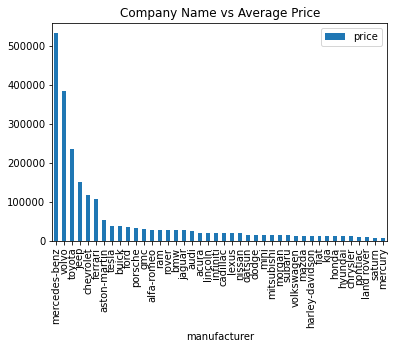

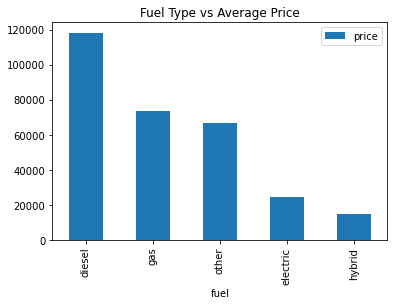

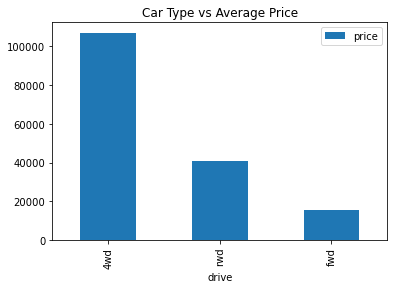

In [123]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['manufacturer'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Company Name vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['fuel'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Fuel Type vs Average Price')
plt.show()

df = pd.DataFrame(cars.groupby(['drive'])['price'].mean().sort_values(ascending = False))
df.plot.bar()
plt.title('Car Type vs Average Price')
plt.show()

- Conclusion:
1. Mercedes Benz seems to have the highest average price
2. "Diesel" has a higher average price than gas.
3. "4WD" has a higher average price.

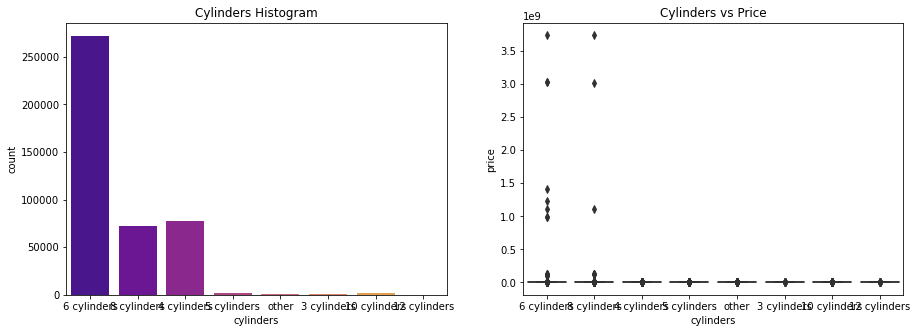

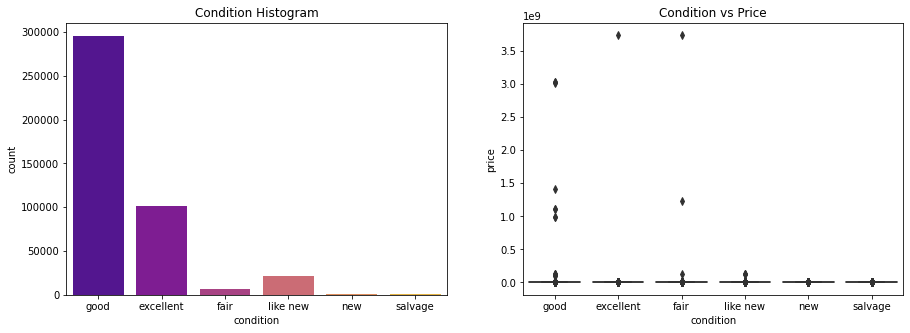

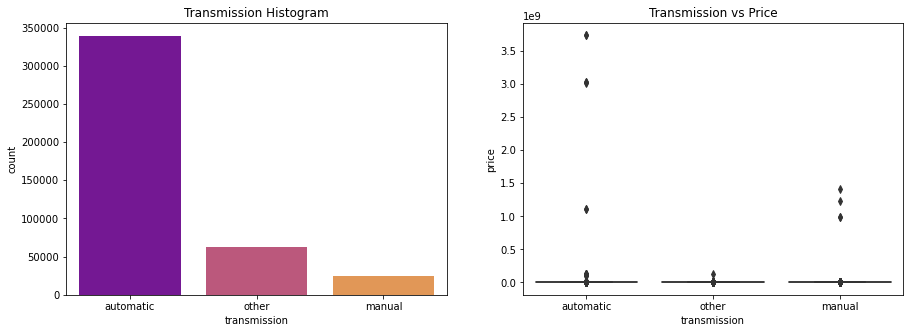

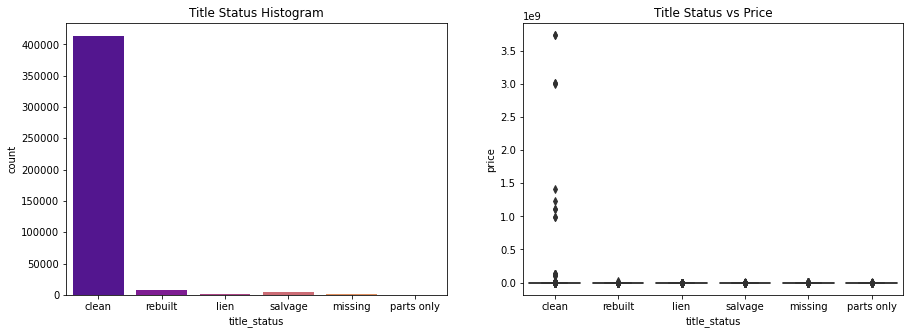

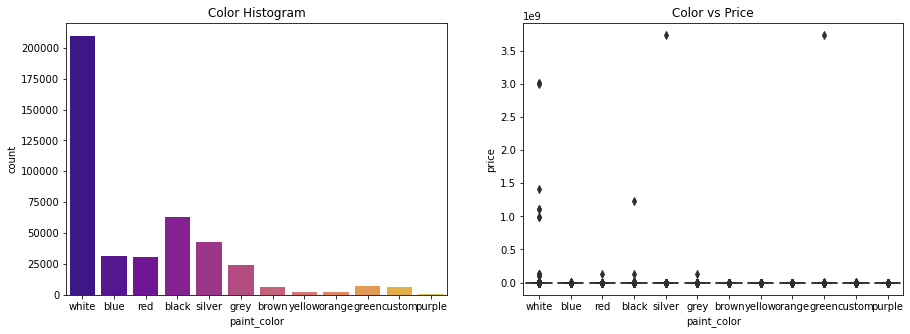

In [124]:
plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Cylinders Histogram')
sns.countplot(cars.cylinders, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Cylinders vs Price')
sns.boxplot(x=cars.cylinders, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

plt.subplot(1,2,1)
plt.title('Condition Histogram')
sns.countplot(cars.condition, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Condition vs Price')
sns.boxplot(x=cars.condition, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

df = pd.DataFrame(cars.groupby(['transmission'])['price'].mean().sort_values(ascending = False))
plt.subplot(1,2,1)
plt.title('Transmission Histogram')
sns.countplot(cars.transmission, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Transmission vs Price')
sns.boxplot(x=cars.transmission, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

df = pd.DataFrame(cars.groupby(['title_status'])['price'].mean().sort_values(ascending = False))
plt.subplot(1,2,1)
plt.title('Title Status Histogram')
sns.countplot(cars.title_status, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Title Status vs Price')
sns.boxplot(x=cars.title_status, y=cars.price, palette=("plasma"))

plt.show()

plt.figure(figsize=(15,5))

df = pd.DataFrame(cars.groupby(['paint_color'])['price'].mean().sort_values(ascending = False))
plt.subplot(1,2,1)
plt.title('Color Histogram')
sns.countplot(cars.paint_color, palette=("plasma"))

plt.subplot(1,2,2)
plt.title('Color vs Price')
sns.boxplot(x=cars.paint_color, y=cars.price, palette=("plasma"))

plt.show()

- Conclusion 
    1. 6 cyclinder cars seems to be the most popular, however 8 cylinder cars seem to be more expensive
    2. White color cars seem to be the most popular color in terms of car color
    3. Highest number of car sold with Automatic transmission. Ther is no visual impact of type of transmission on prices
    4. More cars sold with good conditioon when compared to cars in excellent condition

In [125]:
# Deriving new features

cars['price'] = cars['price'].astype('int')
temp = cars.copy()
table = temp.groupby(['manufacturer'])['price'].mean()
temp = temp.merge(table.reset_index(), how='left',on='manufacturer')
bins = [0,10000,20000,40000]
cars_bin=['Budget','Medium','Highend']
cars['carsrange'] = pd.cut(temp['price_y'],bins,right=False,labels=cars_bin)
cars.head()

,id,region,price,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state,carsrange
0,7222695916,prescott,6000,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,az,Highend
1,7218891961,fayetteville,11900,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ar,Highend
2,7221797935,florida keys,21000,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,fl,Highend
3,7222270760,worcester / central MA,1500,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,ma,Highend
4,7210384030,greensboro,4900,2017.0,ford,f-150,good,6 cylinders,gas,2.0,clean,automatic,1FMJU1JT1HEA52352,4wd,full-size,sedan,white,nc,Highend


<Figure size 1800x432 with 0 Axes>

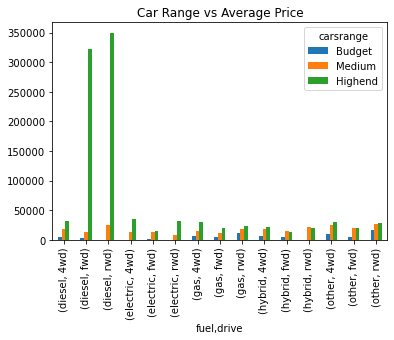

In [189]:
plt.figure(figsize=(25, 6))

df = pd.DataFrame(cars.groupby(['fuel','drive','carsrange'])['price'].mean().unstack(fill_value=0))
df.plot.bar()
plt.title('Car Range vs Average Price')
plt.show()

 - Conclusion
 1. Highend ranged cars prefer rwd drive with diesel fuel type
 
 List of Significant variables after Visual Analysis-
  - Price
  - manufacturer
  - fuel
  - type
  - drive
  - cylinders
  - condition
  - title status
  - transmission
  - paint color
  

### Modeling

With your (almost?) final dataset in hand, it is now time to build some models.  Here, you should build a number of different regression models with the price as the target.  In building your models, you should explore different parameters and be sure to cross-validate your findings.

In [128]:
#a. Identify the Target Variable and Splitting the Data into Train and Test

y=cars['price'] #target variable

X=cars[['id','region','year','manufacturer','model','condition','cylinders','fuel','odometer','title_status','transmission','VIN','drive','size','type','paint_color','state']]
#input variable

In [129]:
#our target variable is continuous,so we are using Regression TASK
#for Regression task:mean square error

In [130]:
# split into train and test

from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.75, random_state=100)

X_train.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
89762,7314751452,"washington, DC",2017.0,mini,convertible cooper s 2d,good,6 cylinders,gas,53538.0,clean,other,WMWWG9C3XH3C81704,fwd,full-size,other,white,dc
127844,7316511528,hawaii,2014.0,lexus,is 250 sedan,good,6 cylinders,gas,61500.0,clean,automatic,JTHBF1D24E5022195,4wd,full-size,sedan,white,hi
158725,7305147655,des moines,2008.0,gmc,sierra,good,8 cylinders,gas,119725.0,salvage,automatic,1FMJU1JT1HEA52352,4wd,full-size,truck,black,ia
82989,7314829450,eastern CT,2015.0,volkswagen,golf tdi sel,good,6 cylinders,diesel,51482.0,clean,other,3VW2A7AU4FM096184,fwd,full-size,sedan,white,ct
80678,7302264180,fort collins / north CO,2005.0,subaru,outback,good,4 cylinders,gas,244000.0,clean,manual,1FMJU1JT1HEA52352,4wd,mid-size,wagon,green,co


In [131]:
print(X_train.shape, y_train.shape)

print(X_test.shape, y_test.shape)

(320160, 17) (320160,)
(106720, 17) (106720,)


In [132]:
#Next Step -  DATA PREPARATION ON TRAIN DATA
#Separating Categorical and Numerical Columns:

X_train.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
89762,7314751452,"washington, DC",2017.0,mini,convertible cooper s 2d,good,6 cylinders,gas,53538.0,clean,other,WMWWG9C3XH3C81704,fwd,full-size,other,white,dc
127844,7316511528,hawaii,2014.0,lexus,is 250 sedan,good,6 cylinders,gas,61500.0,clean,automatic,JTHBF1D24E5022195,4wd,full-size,sedan,white,hi
158725,7305147655,des moines,2008.0,gmc,sierra,good,8 cylinders,gas,119725.0,salvage,automatic,1FMJU1JT1HEA52352,4wd,full-size,truck,black,ia
82989,7314829450,eastern CT,2015.0,volkswagen,golf tdi sel,good,6 cylinders,diesel,51482.0,clean,other,3VW2A7AU4FM096184,fwd,full-size,sedan,white,ct
80678,7302264180,fort collins / north CO,2005.0,subaru,outback,good,4 cylinders,gas,244000.0,clean,manual,1FMJU1JT1HEA52352,4wd,mid-size,wagon,green,co


In [133]:
cars.dtypes

id                 int64
region            object
price              int32
year             float64
manufacturer      object
model             object
condition         object
cylinders         object
fuel              object
odometer          object
title_status      object
transmission      object
VIN               object
drive             object
size              object
type              object
paint_color       object
state             object
carsrange       category
dtype: object

In [135]:
cars.shape

(426880, 19)

In [136]:
#CATEGORICAL COLUMNS
X_train_cat = X_train.select_dtypes(include=['object'])
X_train_cat

X_train_cat.head()

,region,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
89762,"washington, DC",mini,convertible cooper s 2d,good,6 cylinders,gas,53538.0,clean,other,WMWWG9C3XH3C81704,fwd,full-size,other,white,dc
127844,hawaii,lexus,is 250 sedan,good,6 cylinders,gas,61500.0,clean,automatic,JTHBF1D24E5022195,4wd,full-size,sedan,white,hi
158725,des moines,gmc,sierra,good,8 cylinders,gas,119725.0,salvage,automatic,1FMJU1JT1HEA52352,4wd,full-size,truck,black,ia
82989,eastern CT,volkswagen,golf tdi sel,good,6 cylinders,diesel,51482.0,clean,other,3VW2A7AU4FM096184,fwd,full-size,sedan,white,ct
80678,fort collins / north CO,subaru,outback,good,4 cylinders,gas,244000.0,clean,manual,1FMJU1JT1HEA52352,4wd,mid-size,wagon,green,co


In [137]:
X_train_cat.shape

(320160, 15)

In [138]:
#NUMERICAL COLUMNS
X_train_num = X_train.select_dtypes(include=['int64','float64'])

X_train_num.head()

,id,year
89762,7314751452,2017.0
127844,7316511528,2014.0
158725,7305147655,2008.0
82989,7314829450,2015.0
80678,7302264180,2005.0


In [140]:
X_train_num.shape

(320160, 2)

In [141]:
#Applying LABEL ENCODING on Categorical Columns:
#for condition
X_train_cat_le = pd.DataFrame(index=X_train_cat.index)#for CONTRACT COLUMN IT HAS AN ORDER

X_train_cat_le.head()

""
89762
127844
158725
82989
80678


In [142]:
Contract_encoder = {'excellent' : 1, 'good' : 2, 'fair' : 3, 'like new' : 4, 'new' : 5,'salvage' : 6}

X_train_cat_le['condition'] = X_train_cat['condition'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition
89762,2
127844,2
158725,2
82989,2
80678,2
...,...
339799,2
253799,3
210755,2
56088,2


In [143]:
#2.for fuel:LE
Contract_encoder = {'gas' : 1, 'diesel' : 2, 'hybrid' : 3, 'electric' : 4, 'other' : 5}

X_train_cat_le['fuel'] = X_train_cat['fuel'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition,fuel
89762,2,1
127844,2,1
158725,2,1
82989,2,2
80678,2,1
...,...,...
339799,2,1
253799,3,1
210755,2,1
56088,2,1


In [144]:
#3.title_status:LE
Contract_encoder = {'clean' : 1, 'rebuilt' : 2, 'salvage' : 3, 'lien' : 4, 'missing' : 5, 'parts only' : 6}

X_train_cat_le['title_status'] = X_train_cat['title_status'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition,fuel,title_status
89762,2,1,1
127844,2,1,1
158725,2,1,3
82989,2,2,1
80678,2,1,1
...,...,...,...
339799,2,1,1
253799,3,1,1
210755,2,1,1
56088,2,1,1


In [145]:
#4.transmission:LE
Contract_encoder = {'automatic' : 1, 'manual' : 2, 'other' : 3}
X_train_cat_le['transmission'] = X_train_cat['transmission'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition,fuel,title_status,transmission
89762,2,1,1,3
127844,2,1,1,1
158725,2,1,3,1
82989,2,2,1,3
80678,2,1,1,2
...,...,...,...,...
339799,2,1,1,1
253799,3,1,1,1
210755,2,1,1,1
56088,2,1,1,1


In [147]:
#5.drive:LE
Contract_encoder = {'4wd' : 1, 'fwd' : 2, 'rwd' : 3}
X_train_cat_le['drive'] = X_train_cat['drive'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition,fuel,title_status,transmission,drive
89762,2,1,1,3,2
127844,2,1,1,1,1
158725,2,1,3,1,1
82989,2,2,1,3,2
80678,2,1,1,2,1
...,...,...,...,...,...
339799,2,1,1,1,1
253799,3,1,1,1,2
210755,2,1,1,1,1
56088,2,1,1,1,1


In [148]:
#6.size:LE
Contract_encoder = {'full-size' : 1, 'mid-size' : 2, 'compact' : 3, 'sub-compact' : 4}
X_train_cat_le['size'] = X_train_cat['size'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition,fuel,title_status,transmission,drive,size
89762,2,1,1,3,2,1
127844,2,1,1,1,1,1
158725,2,1,3,1,1,1
82989,2,2,1,3,2,1
80678,2,1,1,2,1,2
...,...,...,...,...,...,...
339799,2,1,1,1,1,1
253799,3,1,1,1,2,1
210755,2,1,1,1,1,1
56088,2,1,1,1,1,4


In [149]:
#7.type:LE
Contract_encoder = {'sedan' : 1, 'SUV' : 2, 'pickup' : 3, 'truck' : 4, 'other' : 5,'coupe' : 6,'hatchback' : 7,'wagon' : 8,'van' : 9,'convertible' : 10,'mini-van' : 11,'offroad': 12,'bus':13}
X_train_cat_le['type'] = X_train_cat['type'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition,fuel,title_status,transmission,drive,size,type
89762,2,1,1,3,2,1,5
127844,2,1,1,1,1,1,1
158725,2,1,3,1,1,1,4
82989,2,2,1,3,2,1,1
80678,2,1,1,2,1,2,8
...,...,...,...,...,...,...,...
339799,2,1,1,1,1,1,2
253799,3,1,1,1,2,1,9
210755,2,1,1,1,1,1,1
56088,2,1,1,1,1,4,1


In [151]:
#8.paint_color:LE
Contract_encoder = {'white' : 1, 'black' : 2, 'silver' : 3, 'blue' : 4, 'red' : 5,'grey' : 6,'green' : 7,'custom' : 8,'brown' : 9,'yellow' : 10,'orange' : 11,'purple': 12}
X_train_cat_le['paint_color'] = X_train_cat['paint_color'].apply(lambda x :Contract_encoder[x])

X_train_cat_le

,condition,fuel,title_status,transmission,drive,size,type,paint_color
89762,2,1,1,3,2,1,5,1
127844,2,1,1,1,1,1,1,1
158725,2,1,3,1,1,1,4,2
82989,2,2,1,3,2,1,1,1
80678,2,1,1,2,1,2,8,7
...,...,...,...,...,...,...,...,...
339799,2,1,1,1,1,1,2,3
253799,3,1,1,1,2,1,9,1
210755,2,1,1,1,1,1,1,1
56088,2,1,1,1,1,4,1,3


In [ ]:
# 1.region,2.manufacturer,3.model,4.cylinders,5.VIN,6.state
#for these we did not to do label encoding:

In [153]:
#applying scaling to numerical values:
# scaling the numerical features
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()

# column names are (annoyingly) lost after Scaling
# (i.e. the dataframe is converted to a numpy ndarray)

X_train_num_rescaled = pd.DataFrame(scaler.fit_transform(X_train_num), 
                                    columns = X_train_num.columns, 
                                    index = X_train_num.index)

X_train_num_rescaled.head()

,id,year
89762,0.728457,0.609718
127844,1.121332,0.291074
158725,-1.415253,-0.346214
82989,0.745867,0.397289
80678,-2.058887,-0.664858


In [154]:
#Concatinating the Encoded Categorical Features and Scaled Numerical Features:

X_train_transformed = pd.concat([X_train_num_rescaled,X_train_cat_le], axis=1)

X_train_transformed.head()

,id,year,condition,fuel,title_status,transmission,drive,size,type,paint_color
89762,0.728457,0.609718,2,1,1,3,2,1,5,1
127844,1.121332,0.291074,2,1,1,1,1,1,1,1
158725,-1.415253,-0.346214,2,1,3,1,1,1,4,2
82989,0.745867,0.397289,2,2,1,3,2,1,1,1
80678,-2.058887,-0.664858,2,1,1,2,1,2,8,7


In [156]:
#Preparing Test Data:
X_test.head()

,id,region,year,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
386556,7310167837,st george,2013.0,toyota,sienna,good,6 cylinders,gas,124306.0,rebuilt,automatic,1FMJU1JT1HEA52352,fwd,full-size,van,silver,ut
48650,7316539496,reno / tahoe,2015.0,ford,f-550 f550 f 550,excellent,10 cylinders,gas,267172.0,clean,automatic,1FDUF5GY8FEA99750,rwd,full-size,truck,white,ca
373265,7304670264,el paso,1999.0,chevrolet,corvette,good,6 cylinders,gas,131695.0,rebuilt,manual,1G1YY12G5X5112066,4wd,full-size,coupe,silver,tx
135832,7316937484,spokane / coeur d'alene,2007.0,subaru,outback 2.5i limited,like new,4 cylinders,gas,159000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,mid-size,wagon,custom,id
421385,7306708288,madison,2018.0,dodge,durango gt sport utility,good,6 cylinders,gas,28912.0,clean,other,1C4RDJDG3JC262197,4wd,full-size,SUV,blue,wi


In [157]:
X_test.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer         object
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [158]:
#CATEGORICAL COLUMNS
X_test_cat = X_test.select_dtypes(include=['object'])
X_test_cat

X_test_cat.head()


,region,manufacturer,model,condition,cylinders,fuel,odometer,title_status,transmission,VIN,drive,size,type,paint_color,state
386556,st george,toyota,sienna,good,6 cylinders,gas,124306.0,rebuilt,automatic,1FMJU1JT1HEA52352,fwd,full-size,van,silver,ut
48650,reno / tahoe,ford,f-550 f550 f 550,excellent,10 cylinders,gas,267172.0,clean,automatic,1FDUF5GY8FEA99750,rwd,full-size,truck,white,ca
373265,el paso,chevrolet,corvette,good,6 cylinders,gas,131695.0,rebuilt,manual,1G1YY12G5X5112066,4wd,full-size,coupe,silver,tx
135832,spokane / coeur d'alene,subaru,outback 2.5i limited,like new,4 cylinders,gas,159000.0,clean,automatic,1FMJU1JT1HEA52352,4wd,mid-size,wagon,custom,id
421385,madison,dodge,durango gt sport utility,good,6 cylinders,gas,28912.0,clean,other,1C4RDJDG3JC262197,4wd,full-size,SUV,blue,wi


In [159]:
#NUMERICAL COLUMNS
X_test_num = X_test.select_dtypes(include=['int64','float64'])

X_test_num.head()

,id,year
386556,7310167837,2013.0
48650,7316539496,2015.0
373265,7304670264,1999.0
135832,7316937484,2007.0
421385,7306708288,2018.0


In [160]:
#for condition:LE
X_test_cat_le = pd.DataFrame(index=X_test_cat.index)#for CONTRACT COLUMN IT HAS AN ORDER

X_test_cat_le.head()

""
386556
48650
373265
135832
421385


In [162]:
#1.for condition:LE
Contract_encoder = {'excellent' : 1, 'good' : 2, 'fair' : 3, 'like new' : 4, 'new' : 5,'salvage' : 6}

X_test_cat_le['condition'] = X_test_cat['condition'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition
386556,2
48650,1
373265,2
135832,4
421385,2
...,...
300746,2
266180,2
426716,4
387918,4


In [163]:
#2.for fuel:LE

Contract_encoder = {'gas' : 1, 'diesel' : 2, 'hybrid' : 3, 'electric' : 4, 'other' : 5}

X_test_cat_le['fuel'] = X_test_cat['fuel'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition,fuel
386556,2,1
48650,1,1
373265,2,1
135832,4,1
421385,2,1
...,...,...
300746,2,1
266180,2,1
426716,4,2
387918,4,4


In [164]:
#3.title_stus:LE
Contract_encoder = {'clean' : 1, 'rebuilt' : 2, 'salvage' : 3, 'lien' : 4, 'missing' : 5, 'parts only' : 6}

X_test_cat_le['title_status'] = X_test_cat['title_status'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition,fuel,title_status
386556,2,1,2
48650,1,1,1
373265,2,1,2
135832,4,1,1
421385,2,1,1
...,...,...,...
300746,2,1,1
266180,2,1,1
426716,4,2,1
387918,4,4,1


In [165]:
#4.transmission:LE
Contract_encoder = {'automatic' : 1, 'manual' : 2, 'other' : 3}
X_test_cat_le['transmission'] = X_test_cat['transmission'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition,fuel,title_status,transmission
386556,2,1,2,1
48650,1,1,1,1
373265,2,1,2,2
135832,4,1,1,1
421385,2,1,1,3
...,...,...,...,...
300746,2,1,1,1
266180,2,1,1,3
426716,4,2,1,1
387918,4,4,1,1


In [166]:
#5.drive:LE
Contract_encoder = {'4wd' : 1, 'fwd' : 2, 'rwd' : 3}
X_test_cat_le['drive'] = X_test_cat['drive'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition,fuel,title_status,transmission,drive
386556,2,1,2,1,2
48650,1,1,1,1,3
373265,2,1,2,2,1
135832,4,1,1,1,1
421385,2,1,1,3,1
...,...,...,...,...,...
300746,2,1,1,1,1
266180,2,1,1,3,2
426716,4,2,1,1,1
387918,4,4,1,1,2


In [167]:
#6.size:LE
Contract_encoder = {'full-size' : 1, 'mid-size' : 2, 'compact' : 3, 'sub-compact' : 4}
X_test_cat_le['size'] = X_test_cat['size'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition,fuel,title_status,transmission,drive,size
386556,2,1,2,1,2,1
48650,1,1,1,1,3,1
373265,2,1,2,2,1,1
135832,4,1,1,1,1,2
421385,2,1,1,3,1,1
...,...,...,...,...,...,...
300746,2,1,1,1,1,1
266180,2,1,1,3,2,1
426716,4,2,1,1,1,1
387918,4,4,1,1,2,1


In [168]:
#7.type:LE
Contract_encoder = {'sedan' : 1, 'SUV' : 2, 'pickup' : 3, 'truck' : 4, 'other' : 5,'coupe' : 6,'hatchback' : 7,'wagon' : 8,'van' : 9,'convertible' : 10,'mini-van' : 11,'offroad': 12,'bus':13}
X_test_cat_le['type'] = X_test_cat['type'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition,fuel,title_status,transmission,drive,size,type
386556,2,1,2,1,2,1,9
48650,1,1,1,1,3,1,4
373265,2,1,2,2,1,1,6
135832,4,1,1,1,1,2,8
421385,2,1,1,3,1,1,2
...,...,...,...,...,...,...,...
300746,2,1,1,1,1,1,1
266180,2,1,1,3,2,1,7
426716,4,2,1,1,1,1,4
387918,4,4,1,1,2,1,7


In [169]:
#8.paint_color:LE
Contract_encoder = {'white' : 1, 'black' : 2, 'silver' : 3, 'blue' : 4, 'red' : 5,'grey' : 6,'green' : 7,'custom' : 8,'brown' : 9,'yellow' : 10,'orange' : 11,'purple': 12}
X_test_cat_le['paint_color'] = X_test_cat['paint_color'].apply(lambda x :Contract_encoder[x])

X_test_cat_le

,condition,fuel,title_status,transmission,drive,size,type,paint_color
386556,2,1,2,1,2,1,9,3
48650,1,1,1,1,3,1,4,1
373265,2,1,2,2,1,1,6,3
135832,4,1,1,1,1,2,8,8
421385,2,1,1,3,1,1,2,4
...,...,...,...,...,...,...,...,...
300746,2,1,1,1,1,1,1,1
266180,2,1,1,3,2,1,7,1
426716,4,2,1,1,1,1,4,4
387918,4,4,1,1,2,1,7,5


In [171]:
#scaling the numerical values:
X_test_num_rescaled = pd.DataFrame(scaler.transform(X_test_num), 
                                    columns = X_test_num.columns, 
                                    index = X_test_num.index)

X_test_num_rescaled.head()

,id,year
386556,-0.294674,0.184859
48650,1.127575,0.397289
373265,-1.521814,-1.302146
135832,1.216411,-0.452429
421385,-1.066897,0.715933


In [172]:
#Concatinating the Encoded Categorical Features and Scaled Numerical Features:
X_test_transformed = pd.concat([X_test_num_rescaled,X_test_cat_le], axis=1)

X_test_transformed.head()

,id,year,condition,fuel,title_status,transmission,drive,size,type,paint_color
386556,-0.294674,0.184859,2,1,2,1,2,1,9,3
48650,1.127575,0.397289,1,1,1,1,3,1,4,1
373265,-1.521814,-1.302146,2,1,2,2,1,1,6,3
135832,1.216411,-0.452429,4,1,1,1,1,2,8,8
421385,-1.066897,0.715933,2,1,1,3,1,1,2,4


In [173]:
X_train.dtypes

id                int64
region           object
year            float64
manufacturer     object
model            object
condition        object
cylinders        object
fuel             object
odometer         object
title_status     object
transmission     object
VIN              object
drive            object
size             object
type             object
paint_color      object
state            object
dtype: object

In [174]:
df.isnull().sum()

transmission
automatic    0
manual       0
other        0
dtype: int64

In [175]:
X_train_transformed.head()

,id,year,condition,fuel,title_status,transmission,drive,size,type,paint_color
89762,0.728457,0.609718,2,1,1,3,2,1,5,1
127844,1.121332,0.291074,2,1,1,1,1,1,1,1
158725,-1.415253,-0.346214,2,1,3,1,1,1,4,2
82989,0.745867,0.397289,2,2,1,3,2,1,1,1
80678,-2.058887,-0.664858,2,1,1,2,1,2,8,7


In [176]:
#Build Models
# Model# 1 - KNN regressor:

from sklearn.neighbors import KNeighborsRegressor
neighbour = KNeighborsRegressor()
neighbour.fit(X_train_transformed, y_train)

KNeighborsRegressor()

In [177]:
y_test_pred = neighbour.predict(X_test_transformed)

In [178]:
temp_df = pd.DataFrame({'Actual' : y_test,'Predicted' :y_test_pred })
temp_df.head()

,Actual,Predicted
386556,8550,8550.0
48650,0,16278.8
373265,8800,7910.0
135832,5277,6400.8
421385,34590,39270.0


In [180]:
#Model #2- DECISION TREE REGRESSOR

from sklearn.tree import DecisionTreeRegressor
tree = DecisionTreeRegressor()
tree.fit(X_train_transformed,y_train)

DecisionTreeRegressor()

In [181]:
y_test_pred = tree.predict(X_test_transformed)

In [182]:
temp_df = pd.DataFrame({'Actual' : y_test,'Predicted' :y_test_pred })
temp_df.head()


,Actual,Predicted
386556,8550,8550.0
48650,0,0.0
373265,8800,8800.0
135832,5277,4500.0
421385,34590,22590.0


In [183]:
#Model # 3 - Random forest:

from sklearn.ensemble import RandomForestRegressor
rfc = RandomForestRegressor()
rfc.fit(X_train_num_rescaled,y_train)

RandomForestRegressor()

In [184]:
y_test_pred = rfc.predict(X_test_num_rescaled)

In [185]:
temp_df = pd.DataFrame({'Actual' : y_test,'Predicted' :y_test_pred })
temp_df.head()

,Actual,Predicted
386556,8550,9108.70
48650,0,27680.71
373265,8800,5283.55
135832,5277,4455.95
421385,34590,30136.00


### Evaluation

With some modeling accomplished, we aim to reflect on what we identify as a high quality model and what we are able to learn from this.  We should review our business objective and explore how well we can provide meaningful insight on drivers of used car prices.  Your goal now is to distill your findings and determine whether the earlier phases need revisitation and adjustment or if you have information of value to bring back to your client.

In [186]:
from sklearn import metrics

from sklearn.metrics import r2_score

In [187]:
from sklearn.metrics import mean_squared_error
import math
print(mean_squared_error(y_test, y_test_pred))
print(math.sqrt(mean_squared_error(y_test, y_test_pred)))

26979003832917.46
5194131.672658815


In [188]:
from sklearn import metrics

print('Mean Absolute Error: ', metrics.mean_absolute_error(y_test, y_test_pred))

print('Mean Squared Error: ', metrics.mean_squared_error(y_test, y_test_pred))

print('Root Mean Squared Error: ', np.sqrt(metrics.mean_squared_error(y_test, y_test_pred)))

Mean Absolute Error:  60397.23527272066
Mean Squared Error:  26979003832917.46
Root Mean Squared Error:  5194131.672658815


### Deployment

Now that we've settled on our models and findings, it is time to deliver the information to the client.  You should organize your work as a basic report that details your primary findings.  Keep in mind that your audience is a group of used car dealers interested in fine tuning their inventory.

# Final Report

## Summary :
1. Ford seems to be the favorite car company.
2. The number of cars running on "gas" is more than "diesel".
3. Sedan is the most popular type of car, followed by SUV.
4. 6 cyclinder cars seems to be the most popular, however 8 cylinder cars seem to be more expensive.
5. White color cars seem to be the most popular color in terms of car color, which has a bit of impact on the prices of the car.
6. Highest number of car sold with Automatic transmission. There appears to be no impant of type of transmission on prices of the used cars.
7. More cars sold with good condition when compared to cars in excellent condition. In other words Excellent condition car does not guarantee a higher price or more sale of the cars
8. When derived the extra features and categorinzing the cars in High, Medium and Budgeted cars, it appeared that customers prefered Highend ranged cars with rwd drive and diesel fuel type

###  Modeling Evaluation :
1. Three Models were developed using the dataset:
    a. KNeighbor Regressor
    b. Decission Tree Regressor
    c. Random Forest Regressor
    
 Analyzing the model results Decission tree Regressor model seemed to be the model with high accuracy in prediction v/s actual results from the dataset
 
 	Actual	Predicted
386556	8550	8550.0
48650	0	0.0
373265	8800	8800.0
135832	5277	4500.0
421385	34590	22590.0
